In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nadia = cv2.imread('../DATA/Nadia_Murad.jpg',0)
denis = cv2.imread('../DATA/Denis_Mukwege.jpg',0)
solvay = cv2.imread('../DATA/solvay_conference.jpg',0)

In [4]:
#classifier (분류기) 를 만들고 XML classifier를 진행하는것 
face_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_eye_tree_eyeglasses.xml')

In [8]:
def detect_face(img):  #얼굴 분류기
    face_img = img.copy()

    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5) #x,y 포지션, 사각형의 넓이와 높이도 포함

    for(x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)

    return face_img

In [9]:
result = detect_face(solvay)

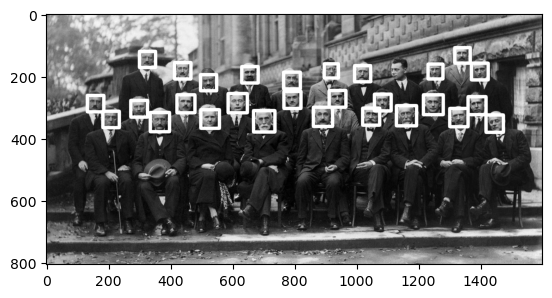

In [10]:
plt.imshow(result, cmap='gray')

In [11]:
eye_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_eye.xml') 
#캐스케이드 파일, 여기서 이건 눈을 detect 할 수 있게 함

In [12]:
def detect_eyes(img): # 눈 분류기
    face_img = img.copy()

    eyes_rects = eye_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=14) #x,y 포지션, 사각형의 넓이와 높이도 포함

    for(x,y,w,h) in eyes_rects:
        #cv2.circle(face_img,(x,y),(x+w,y+h),(255,255,255),2)
        cv2.circle(face_img,(x+int(w/2),y+int(h/2)),9,(255,255,255),1)

    return face_img

In [13]:
result = detect_eyes(nadia)

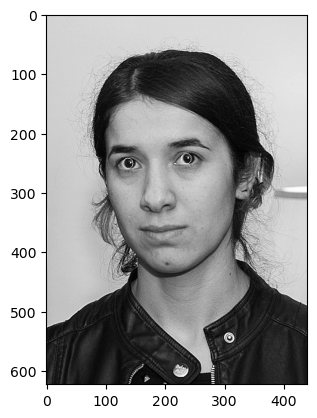

In [14]:
plt.imshow(result,cmap='gray')
#여기서 콧구멍도 눈이라고 생각해서 감지하는 경우가 발생할 수 있다. 이럴경우
#멀티스케일을 조절해야 함 -> 스케일 비율과 최소 이웃을 조절 

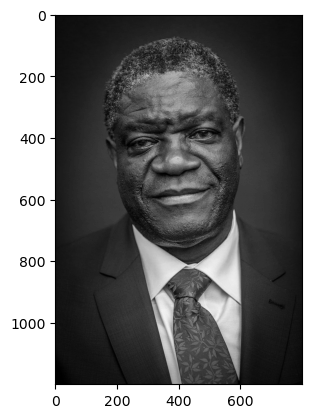

In [15]:
result = detect_eyes(denis)
plt.imshow(result,cmap='gray')

In [16]:
## 웹캠 인식하여 안구영역 검출
cap = cv2.VideoCapture(0) # 웹캠 연결
while True:
    ret,frame = cap.read(0)

    frame = detect_eyes(frame) #영상의 프레임에 detect_eyes 함수 적용

    cv2.imshow('video Face Detect', frame) # 그 프레임을 보여줌 

    if cv2.waitKey(1) & 0xff == ord('q'): # q 누르면 종료
        break

cap.release()
cv2.destroyAllWindows()